# ADASYN Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import (
    make_blobs,
    make_classification
)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import ADASYN

plt.style.use("dark_background")

---

## Create Data

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples = num_samples_total,
    centers = centers,
    n_features= num_features_for_samples,
    cluster_std= cluster_std
)

# transform arrays into pandas formats
X = pd.DataFrame(X, columns = ["VarA", "VarB"])
y = pd.Series(y)


# create an imbalanced dataset
# make blobs creates the same number of observations per class

X = pd.concat([
    X[y ==0],
    X[y == 1].sample(200, random_state = 42)
], axis = 0)

y = y.loc[X.index]

# display size
X.shape, y.shape 

((1000, 2), (1000,))

In [3]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(
        n_samples = 1000,
        n_features= 2,
        n_redundant = 0,
        n_clusters_per_class= 1,
        weights= [0.99],
        class_sep= sep,
        random_state= 42
    )
    
    X = pd.DataFrame(X, columns = ["VarX", "VarZ"])
    y = pd.Series(y)
    
    return X, y

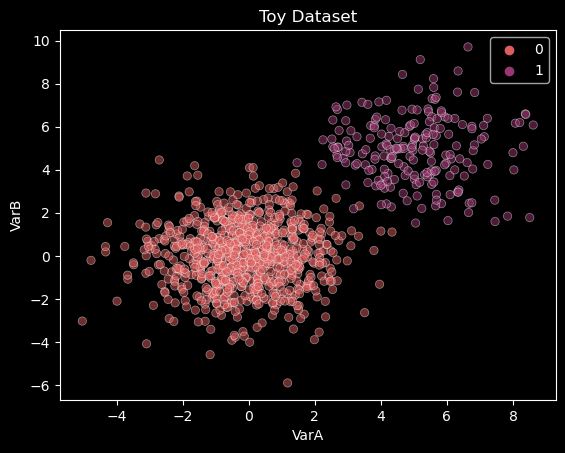

In [4]:
sns.scatterplot(
    data = X, 
    x = "VarA",
    y = "VarB",
    palette = "flare",
    hue = y,
    alpha = 0.5
)
plt.title("Toy Dataset");

# ADASYN

In [5]:
ada = ADASYN(
    sampling_strategy= "auto", # samples only the minority class
    random_state= 42,
    n_neighbors= 5,
)

X_res, y_res = ada.fit_resample(X, y)

In [6]:
# Size of the original Dataset

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Size of the under-sampled Dataset

X_res.shape, y_res.shape

((1601, 2), (1601,))

In [8]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 1    801
 0    800
 Name: count, dtype: int64)

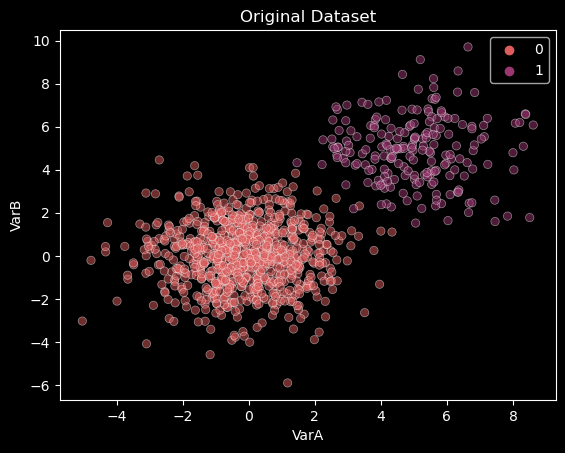

In [9]:
# plot of the original data

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    palette= "flare",
    hue = y,
    alpha = 0.5
)
plt.title("Original Dataset");

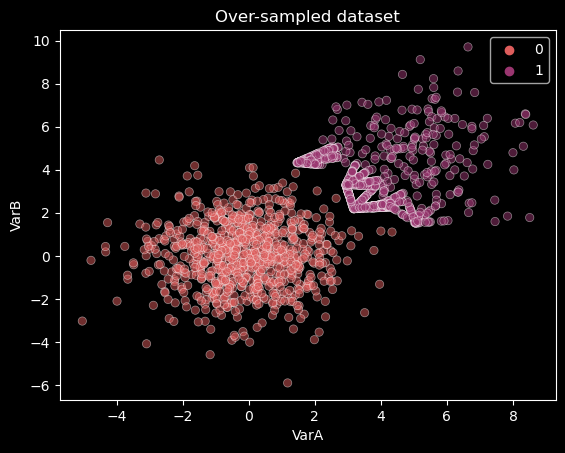

In [10]:
# plot of resampled dataset

sns.scatterplot(
    data = X_res,
    x= "VarA",
    y = "VarB",
    hue = y_res,
    palette="flare",
    alpha = 0.5
)

plt.title("Over-sampled dataset");

<blockquote>There are now new observations that differ from the originals. 

<br>New observations sit at the boundary between the classes.</blockquote>

### Well separated classes

In [11]:

# Create dataset

X, y = make_data(sep = 2)

# set up ADASYN transformer

ada = ADASYN(
    sampling_strategy= "auto",
    random_state = 42,
    n_neighbors = 5
)

X_resampled, y_resampled = ada.fit_resample(X, y)

In [12]:
X_resampled.shape, y_resampled.shape

((1970, 2), (1970,))

In [13]:
# number of minority class observations

y.value_counts()

0    985
1     15
Name: count, dtype: int64

In [14]:
y_resampled.value_counts()

0    985
1    985
Name: count, dtype: int64

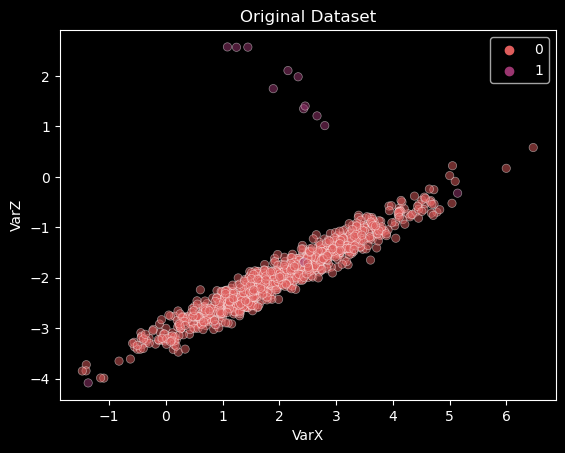

In [15]:
sns.scatterplot(
    data = X,
    x = "VarX",
    y = "VarZ",
    hue = y,
    palette= "flare",
    alpha = 0.5
)
plt.title("Original Dataset");

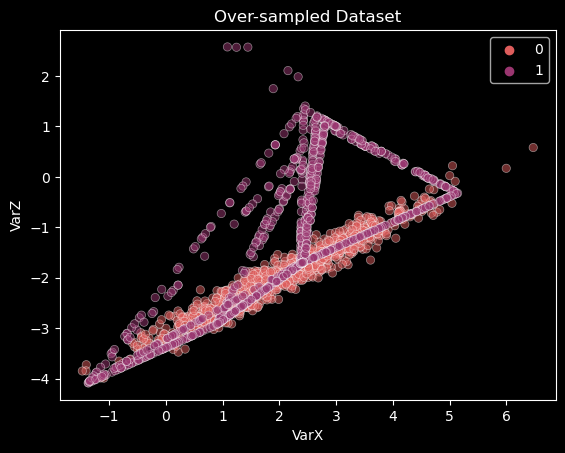

In [16]:
# plot over-sampled dataset

sns.scatterplot(
    data = X_resampled,
    x = "VarX",
    y = "VarZ",
    hue = y_resampled,
    palette = "flare",
    alpha = 0.5
)
plt.title("Over-sampled Dataset");

### Partially separated classes

In [17]:
# create data

X, y = make_data(sep = 0.5)

# Set up ADASYN transformer

ada = ADASYN(
    sampling_strategy= "auto",
    n_neighbors= 5,
    random_state= 42
)

X_resampled, y_resampled = ada.fit_resample(X, y)

In [18]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [19]:
# undersampled data

X_resampled.shape, y_resampled.shape

((1970, 2), (1970,))

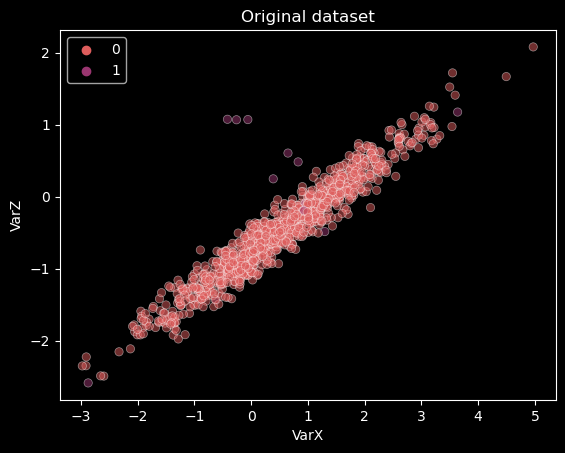

In [20]:
sns.scatterplot(
    data=X, 
    x="VarX", 
    y="VarZ", 
    hue=y, 
    palette="flare",
    alpha = 0.5
)

plt.title('Original dataset')
plt.show()

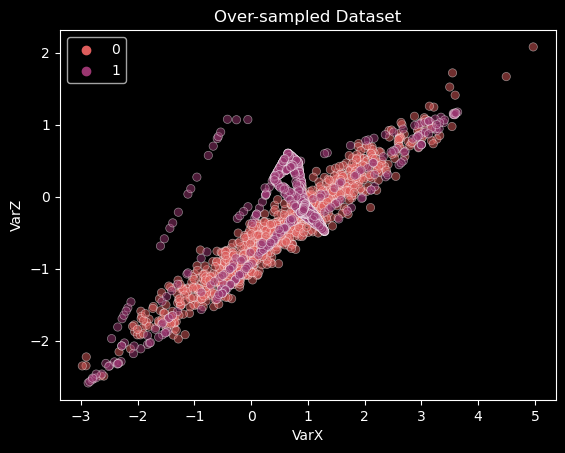

In [21]:
# plot over-sampled dataset

sns.scatterplot(
    data = X_resampled,
    x = "VarX",
    y = "VarZ",
    hue = y_resampled,
    palette = "flare",
    alpha = 0.5
)
plt.title("Over-sampled Dataset");

<blockquote>There is more overlap between the majority and minority classes</blockquote>

---

## Real data - Performance comparison

In [23]:
data = pd.read_csv("../kdd2004.csv").sample(10000)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
85854,70.87,31.11,-1.33,-11.0,89.0,2138.4,-0.12,-0.19,8.5,-72.5,...,2576.6,2.02,1.47,8.0,-47.0,363.8,0.47,0.55,0.38,-1
36549,37.36,30.43,0.54,10.0,24.5,1895.9,0.58,-0.47,18.5,-64.0,...,1590.0,1.25,1.77,6.0,-83.0,294.6,1.84,0.27,0.02,-1
123851,38.62,33.33,0.57,-13.0,13.5,1108.2,0.42,0.64,-19.5,-71.5,...,1345.0,0.95,0.41,-8.0,-37.0,388.9,-0.44,0.35,0.16,-1
15956,56.00,26.53,0.89,-6.5,44.5,2011.4,0.46,-0.89,7.5,-82.0,...,2396.5,-0.57,-1.36,-1.0,-56.0,103.8,2.40,-0.06,0.12,-1
87168,85.32,21.61,-0.50,11.5,-13.5,872.1,0.89,-0.82,6.5,-76.5,...,125.7,2.22,0.85,-4.0,-73.0,80.5,1.63,0.24,0.27,-1


In [24]:
# target imbalance
data["target"].value_counts() / len(data)

target
-1    0.9906
 1    0.0094
Name: count, dtype: float64

In [25]:
# Separate dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels = ["target"], axis = 1),
    data["target"],
    test_size = 0.3,
    random_state= 42,
)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [26]:
ada = ADASYN(
    sampling_strategy= "auto",
    n_neighbors = 5,
    random_state = 42
)

X_resampled, y_resampled = ada.fit_resample(X_train, y_train)

In [27]:
# size of over-sampled dataset

X_resampled.shape, y_resampled.shape

((13886, 74), (13886,))

In [28]:
# numbor of positive class in orginal dataset

y_train.value_counts()

target
-1    6944
 1      56
Name: count, dtype: int64

### Plot Data

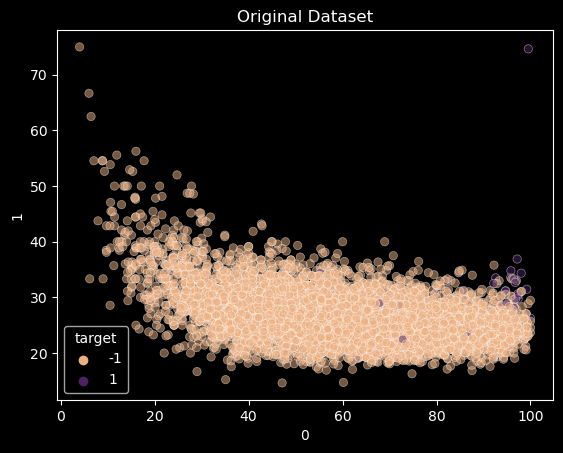

In [30]:
# Original data

sns.scatterplot(
    data = X_train,
    x = "0",
    y = "1",
    hue = y_train,
    palette= "flare",
    alpha = 0.5
)
plt.title("Original Dataset");

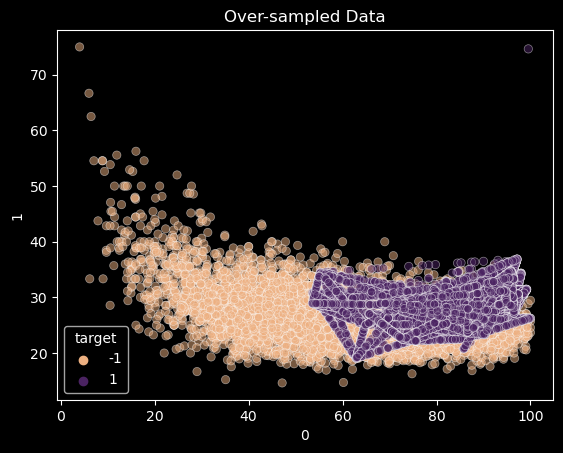

In [34]:
# Over-sampled Data

sns.scatterplot(
    data = X_resampled,
    x = "0",
    y = "1",
    hue = y_resampled,
    palette= "flare",
    alpha = 0.5
)
plt.title("Over-sampled Data");

In [35]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [36]:
# evaluate performance of algorithm built using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.99459193959842
Test set
Random Forests roc-auc: 0.9695618181172039


In [37]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9989387462543499
Test set
Random Forests roc-auc: 0.9729290308824052


<blockquote>Performance increased slightly.</blockquote>

---